#Trabalho prático # 5
##Introdução à Computação Numérica

###Tópico: Solução de Problemas de Valor Inicial (PVI)

---

Nome: Afonso Lustosa Pires Junior

DRE: 122 079 084


---

**Instruções:**

**Preencha o notebook** com seus dados, seus códigos e **rode todos os códigos**

**Inclua  um relatório, na parte final do notebook,** com suas conclusões, respostas, observações e comentários relacionados com os tópicos e questões abordadas nas tarefas.  

**A elaboração dos códigos pode ser realizada em duplas, mas o resto do trabalho é individual.**

*Se você fez o seu trabalho em dupla inclua essa informação no relatório. Além disso, se você  também recebeu ajuda de um(a) colega/amigo(a) ou consultou/usou informações da internet ou outras fontes, coloque referências à elas no seu relatório.*


**Entrega do trabalho:**

*Data de entrega: 15/julho/2023*

---


## Tarefa #1:

 Desenvolver códigos, na forma de funções que implementem:

a) O Método de Euler.

b) O Método  de Euler aperfeiçoado (ou Método de Heun).

c) O Método de Runge-Kutta clássico de quarta ordem.



In [ ]:
# edo: EDO conhecida
# a: valor inicial
# b:valor desejado
# y0: valor inicial
# n: numero de pontos a ser utilizado
def metodo_euler(edo, a, b,y0, n):
    delta_t = (b-a)/n
    t_n = [ (a + delta_t*i) for i in range(n)  ]
    #Começa a lista com o valor inicial
    y_n = [y0]
    for i in t_n:
        #usando aprox. linear de 2a ordem
        d = edo(i,y_n[-1])
        y_n.append( y_n[-1] + delta_t*d)

    return y_n

In [ ]:
def metodo_heun(edo,a,b,y0,n):
    delta_t = (b-a)/n
    #note que uso range (n+1) pois precisamos, na formula, de um t avançado
    t_n = [ ( a + delta_t*i ) for i in range(n+1) ]
    y_n = [y0]

    for i in range(n):
        t = t_n[i]
        t_1 = t_n[i+1]

        k1 = edo(t,y_n[-1])*delta_t
        k2 = edo(t_1,y_n[-1] + k1)*delta_t
        y_n.append( y_n[-1] + 0.5*(k1 + k2) )

    return y_n

In [ ]:
def metodo_rk4(edo,a,b,y0,n):
    delta = (b-a)/n
    t_n = [ a + delta*i for i in range(n)]
    y_n = [y0]
    for t in t_n:
        yn=y_n[-1]
        k1 = delta*edo(t,yn)
        k2 = delta*edo(t + 0.5*delta,yn + 0.5*k1)
        k3 = delta*edo(t + 0.5*delta,yn + 0.5*k2)
        k4 = delta*edo(t + delta,yn + k3)
        y_n.append( yn + (1/6)*(k1 + 2*k2 + 2*k3 + k4))

    return y_n


## Tarefa #2: Paraquedista em queda livre

Utilize os seus códigos (da tarefa anterior, itens a), b) e c) ) para responder a seguinte questão.   
**Qual será a velocidade vertical atingida  por um paraquedista em queda livre (a velocidade inicial é nula), $25\,s$ após o salto?**


a) Considere que a taxa de variação instantânea da velocidade do paraquedista é dada pela EDO
$$\frac{dv}{dt}=g-\frac{c}{m} v, $$
onde $g=9.81\,m/s^2$ é a aceleração da gravidade, $m=75\,kg$ é a massa do paraquedista e $c=12.5\,kg/s$ é o coeficiente de arrasto correspondente ao paraquedas.

Para cada método implementado determine um número de passos tal que o erro na aproximação da velocidade final $v(25)$ seja inferior a $10^{-2}$, se sabemos que o valor exato da velocidade  pode ser calculado pela fórmula
$$v(t) = \frac{gm}{c}\left( 1-e^{-(c/m)t}\right).$$

Dica: Isto poderá ser feito por tentativa e erro.

b) Considere uma outra lei para a taxa de variação instantânea da velocidade do paraquedista dada pela EDO
$$\frac{dv}{dt}=g-\frac{C(v)}{m} v, $$
onde a função empiríca $C(v)$ que caracteriza a resistência do paraquedas é dada por
$$C(v) = c\left[1+\alpha \left(\frac{v}{v_{max}}\right)^\beta\right],$$
em que $c=12.5\,kg/s$, $\alpha=0.2$, $\beta =1.1$ e $v_{max} = 46\,m/s$.  (Observe que no caso $\alpha=0$ este modelo coincide com o apresentado no item a).)

Obtenha a velocidade final usando cada um dos métodos implementados considerando o mesmo número de passos definido no item a)).

c) Compare as velocidades obtidas nos itens a) e b).



Velocidade aos 25 segundos:
Valor de referência: 57.947443177162313077133148908615
Método de Euler: 57.957437887733775028209493029863
Método de Heun : 57.937568972962623092826106585562
Método de Runge Kutta 4ª ordem: : 57.940868592120587265981157543138




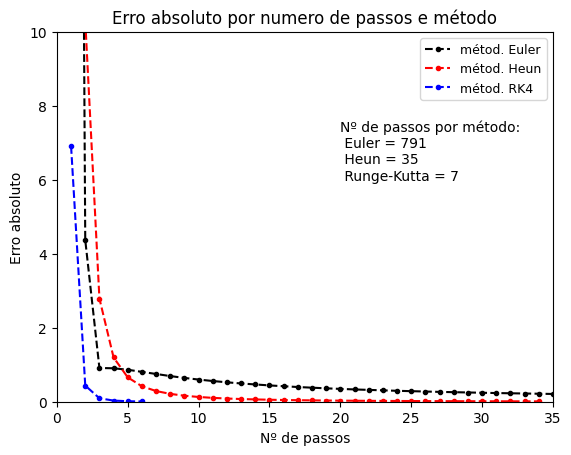

In [ ]:
# TAREFA 2  #  ITEM A

import math
import matplotlib.pyplot as pyplot
# Função dada para calcular o valor de referência.
def velocidade(g,m,c,t):
    result = 0
    result += g*m/c
    result *= (1 - math.e**(-(c/m)*t))
    return result

def edo_paraquedista(x,y):
    g = 9.81
    m = 75
    c = 12.5
    return g - (c/m)*y

g = 9.81
m = 75
c = 12.5
t = 25

valor_ref = velocidade(g,m,c,t)
metodos = [metodo_euler,metodo_heun,metodo_rk4]
#listas que guardarão dados para euler,heun e rk
num_passos = []
valores_finais = []
erros = []
for metodo in metodos:
    i=1
    valores = metodo(edo_paraquedista,0,t,0,i)
    erro =  math.fabs(valor_ref - valores[-1] )
    erros.append( [ ])
    while( 0.01 <= erro ):
        # print("Teste realizado para  {}  passos. Erro =  {} \n".format(i,erro))
        i+=1
        valores = metodo(edo_paraquedista,0,t,0,i)
        erro =  math.fabs(valor_ref - valores[-1] )
        erros[-1].append(erro)

    num_passos.append(i)
    valores_finais.append(valores)
# for lista,passos,erro in zip(valores_finais,num_passos,erros):
#     print("Valores finais = {}\nNum passos = {}     Erro = {}".format(lista[-1],passos,erro))

print("\nVelocidade aos 25 segundos:"
      "\nValor de referência: {:.30f}"
      "\nMétodo de Euler: {:.30f}"
      "\nMétodo de Heun : {:.30f}"
      "\nMétodo de Runge Kutta 4ª ordem: : {:.30f}\n\n"
      .format(valor_ref,valores_finais[0][-1],valores_finais[1][-1],valores_finais[2][-1]))
#plotando graficos]

pyplot.title("Erro absoluto por numero de passos e método")
pyplot.xlabel("Nº de passos")
pyplot.ylabel("Erro absoluto")
pyplot.plot(range(1,num_passos[0]),erros[0],"ko",label="métod. Euler",markersize=3,linestyle='dashed')
pyplot.plot(range(1,num_passos[1]),erros[1],"ro",label="métod. Heun",markersize=3,linestyle='dashed')
pyplot.plot(range(1,num_passos[2]),erros[2],"bo",label="métod. RK4",markersize=3,linestyle='dashed')
pyplot.legend(fontsize=9)
pyplot.axis([0, 35, 0, 10])
pyplot.text(20,6,'Nº de passos por método:\n Euler = 791\n Heun = 35\n Runge-Kutta = 7')
pyplot.show()

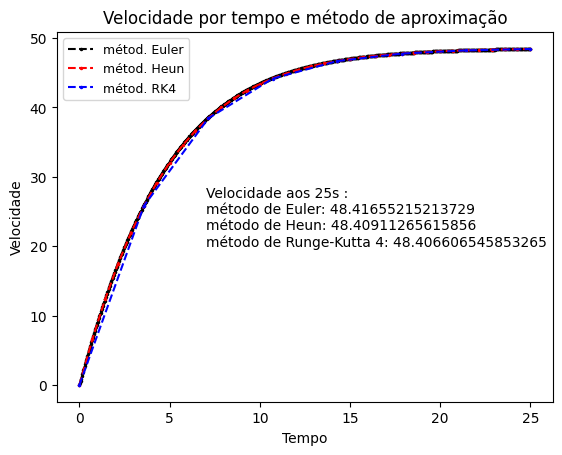

In [ ]:
# TAREFA 2  #  ITEM B
import numpy
def resistencia_paraquedas(v,v_max,c,alfa,beta):
    result = c * (1 + alfa * ((v/v_max)**(beta)) )
    return result

def edo2_paraquedista(x,y):
    g = 9.81
    m = 75
    r = resistencia_paraquedas(y,46,12.5,0.2,1.1)
    return  g - (r/m)*y

valores_itemb = []
for metodo,n_passo in zip(metodos,num_passos):
    valores_itemb.append(metodo(edo2_paraquedista,0,25,0,n_passo))

pyplot.title("Velocidade por tempo e método de aproximação")
pyplot.xlabel("Tempo")
pyplot.ylabel("Velocidade")
pyplot.plot(numpy.linspace(0,25,num_passos[0]+1),valores_itemb[0],"k.",label="métod. Euler",markersize=3,linestyle='dashed')
pyplot.plot(numpy.linspace(0,25,num_passos[1]+1),valores_itemb[1],"r.",label="métod. Heun",markersize=3,linestyle='dashed')
pyplot.plot(numpy.linspace(0,25,num_passos[2]+1),valores_itemb[2],"b.",label="métod. RK4",markersize=3,linestyle='dashed')
pyplot.legend(fontsize=9)
pyplot.text(7,20,"\nVelocidade aos 25s :"
      "\nmétodo de Euler: {}"
      "\nmétodo de Heun: {}"
      "\nmétodo de Runge-Kutta 4: {}"
      .format(valores_itemb[0][-1],valores_itemb[1][-1],valores_itemb[2][-1]))
pyplot.show()

In [ ]:
#Velocidades obtidas no item b são menores que a do item a, por terem um arrasto variável depedente da velocidade atual, logo, crescente com o tempo.

## Tarefa #3: Propagação de uma doença infecciosa

Para modelar a dinâmica de uma doença infecciosa em que os indivíduos se recuperam sem imunidade, é usado o seguinte sistema de duas EDOs conhecido como modelo SIS:

$$
\left\{
\begin{aligned}
\frac{d S}{dt} &= -\beta S I + \gamma I\\
\frac{d I}{dt} &= \beta S I - \gamma I
\end{aligned}
\right.
$$

onde $S$ e $I$ representam o número de indivíduos suscetíveis e infectados, respectivamente, $t$ o tempo,  $\beta$ a velocidade de contacto ou infecção da doença e $\gamma$ a taxa de recuperação média.

Considere uma cidade com uma população de $10000$ indivíduos todos suscetíveis. Se um único indivíduo infectado entra na cidade to tempo $t = 0$, qual será a quantidade de indivíduos suscetíveis e infectados após $3$ semanas? Use os parâmetros $\beta = 0.0003/(\mathit{indivíduo\cdot dia})$ e $\gamma = 0.15/\mathit{dia}$.

Utilize o seu código do método de RK de $4^a$ ordem (tarefa #1, item c)) para responder a essa questão. Procure uma aproximação com erro estimado inferior a $0.05$. Explique.

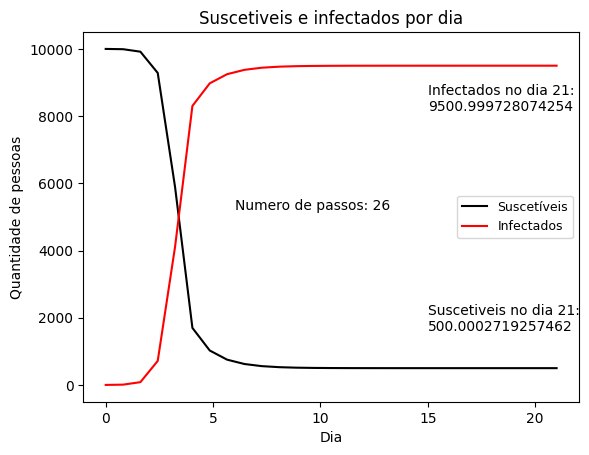

In [ ]:

##############   TAREFA 3 ###################


def dsdt_vetorial(x,y_n):
    s = y_n[0]
    i = y_n[1]
    ds =  (-0.0003*s*i + 0.15*i)
    vetor = numpy.array([ds,-ds])
    return vetor

#começando com 21 passos e aumentando o numero de passos até a variação com os incrementos não mudarem mais que 0.05
y0 = numpy.array([10000,1])
i=t=21
valores_antigo = metodo_rk4(dsdt_vetorial,0,t,y0,i)
i+=1
valores = metodo_rk4(dsdt_vetorial,0,21,y0,i)
variacao = math.fabs(valores[-1][0] - valores_antigo[-1][0])

while( variacao >=0.05 ):
    i+=1
    valores_antigo = valores
    valores = metodo_rk4(dsdt_vetorial,0,t,y0,i)
    variacao = math.fabs(valores[-1][0] - valores_antigo[-1][0])


suscetiveis = [ par[0] for par in valores]
infectados = [ par[1] for par in valores]


pyplot.title("Suscetiveis e infectados por dia")
pyplot.xlabel("Dia")
pyplot.ylabel("Quantidade de pessoas")
pyplot.plot(numpy.linspace(0,21,i+1),suscetiveis,"k",label="Suscetíveis",markersize=3)
pyplot.plot(numpy.linspace(0,21,i+1),infectados,"r",label="Infectados",markersize=3)
pyplot.legend(fontsize=9)
pyplot.text(15,8150,"Infectados no dia 21:\n{}".format(valores[-1][1]))
pyplot.text(15,1600,"Suscetiveis no dia 21:\n{}".format(valores[-1][0]))
pyplot.text(6,5200,"Numero de passos: {}".format(i))
pyplot.show()

# Relatório

## Tarefa 1

Foram implementadas as funções para os métodos pedidos. Considerando como entrada, para cada um dos métodos:
 * edo: EDO conhecida
 * a: Valor inicial
 * b: Valor desejado
 * y0: Valor inicial
 * n: Numero de pontos/passos a ser utilizado


 As funções retornam uma lista com todos os valores para cada passo.

 O método de Euler foi implementado com aproximações lineares.

## Tarefa 2
###Item a)
O número de passos $n$ foi determinado por tentativa e erro, partindo de $n=1$.

Observa-se a melhor eficiência do método de Runge-Kutta de 4ª ordem, que precisou de somente 7 passos até o erro tornar-se menor que 0.01.

Assim como a melhor eficiência de Heun sobre Euler, que precisaram de 35 e 791 passos respectivamente, até o erro atingir o limiar desejado.

###Item b)

Calculando com uma resistência do ar variável, e de certa forma proporcional à velocidade do paraquedista, temos um fator de resistência que aumenta e ultrapassa o valor antes fixado em $12.5$ .

Logo, com uma resistência maior, o valor encontrado é menor, em comparação ao do item A.

## Tarefa 3

O cálculo da população suscetível/infectada para o 21º dia é computado inicialmente com $n=21$ passos.

 Após isto, é incrementado $1$ a $n$, enquanto o aumento de $n$ causar uma variação superior à 0.05 em relação ao valor encontrado anteriormente.

 Desta forma foram utilizados $n=26$ passos, obtendo o valor máximo de infecções, 9500 pessoas. Observa-se na verdade que este valor se mantém constante desde o dia 7, aproximadamente.
